Before conversion:
0   2013-11-12
1   2013-11-12
2   2013-06-17
3   2012-10-18
4   2012-10-18
5   2011-06-14
6   2011-06-14
7   2011-06-14
8   2011-06-14
9   2011-06-14
Name: Date, dtype: datetime64[ns]
After conversion:
0   2013-11-12
1   2013-11-12
2   2013-06-17
3   2012-10-18
4   2012-10-18
5   2011-06-14
6   2011-06-14
7   2011-06-14
8   2011-06-14
9   2011-06-14
Name: Date, dtype: datetime64[ns]


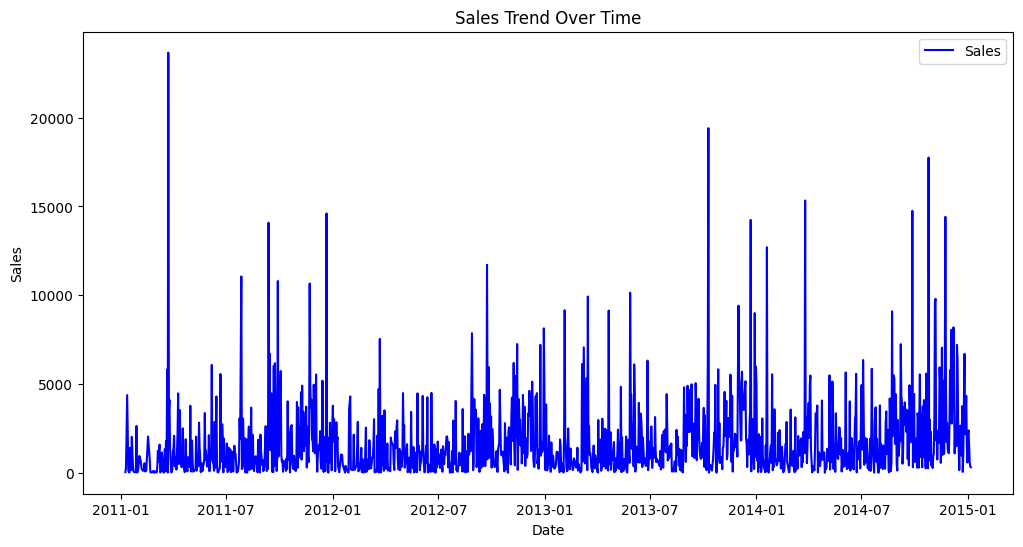

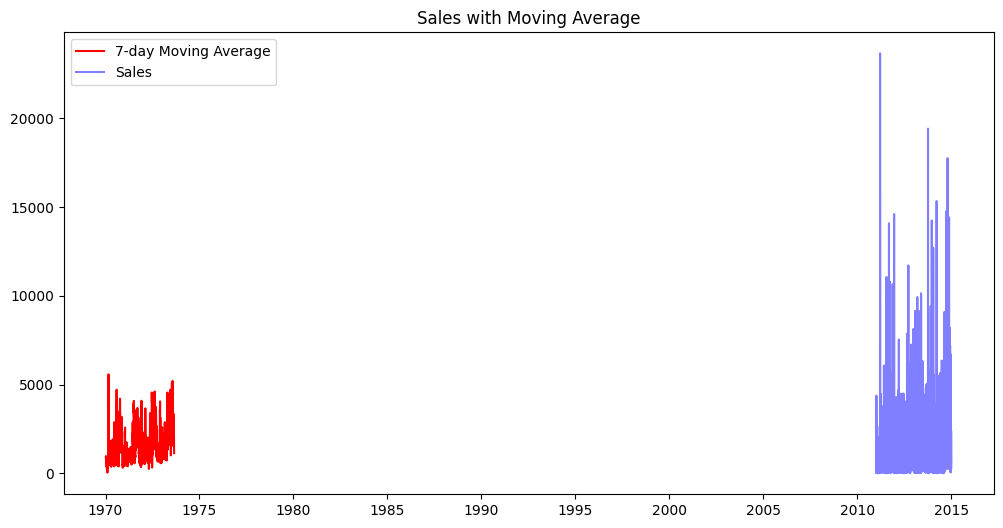

Root Mean Squared Error (RMSE): 2475.3345328590963


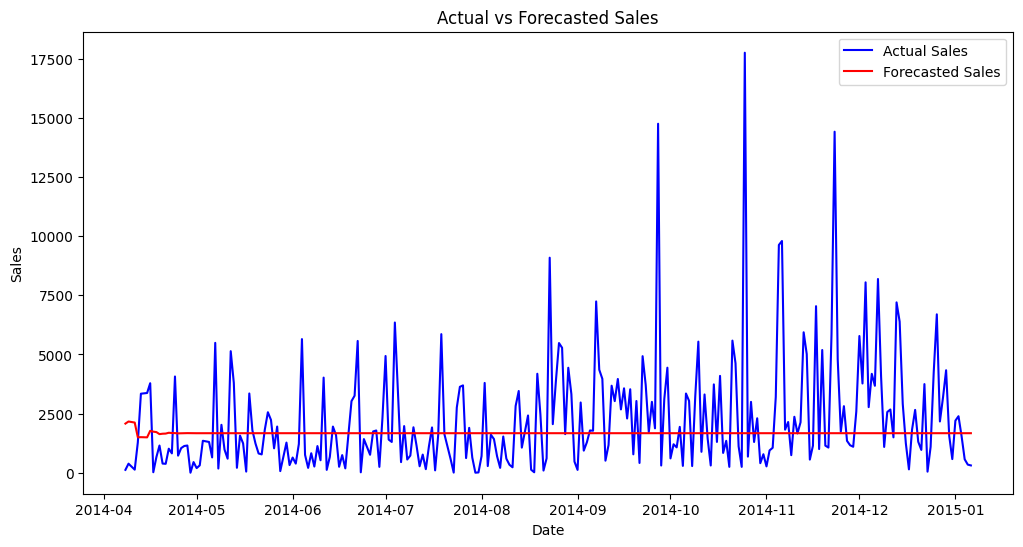

           Date  Predicted Sales
1067 2015-01-07      2078.413370
1068 2015-01-08      2166.518906
1069 2015-01-09      2122.090293
1070 2015-01-10      1499.859187
1071 2015-01-11      1504.702226
1072 2015-01-12      1496.460961
1073 2015-01-13      1772.057264
1074 2015-01-14      1737.776346
1075 2015-01-15      1718.570607
1076 2015-01-16      1633.062827
1077 2015-01-17      1650.467641
1078 2015-01-18      1656.171167
1079 2015-01-19      1690.753295
1080 2015-01-20      1679.704188
1081 2015-01-21      1676.199516
1082 2015-01-22      1665.375896
1083 2015-01-23      1670.089869
1084 2015-01-24      1671.226901
1085 2015-01-25      1675.304507
1086 2015-01-26      1672.989425
1087 2015-01-27      1672.550345
1088 2015-01-28      1671.280400
1089 2015-01-29      1672.213804
1090 2015-01-30      1672.340536
1091 2015-01-31      1672.791358
1092 2015-02-01      1672.382724
1093 2015-02-02      1672.351228
1094 2015-02-03      1672.212777
1095 2015-02-04      1672.372017
1096 2015-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset with correct encoding
df = pd.read_excel("Superstore.xlsx", engine="openpyxl")

# Remove duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Strip extra spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Ensure the correct column name
df = df.rename(columns={"Order Date": "Date", "Sales": "Sales"})

# Check if Date column exists and correctly format it
if "Date" in df.columns:
    print("Before conversion:")
    print(df["Date"].head(10))  # Check first 10 values
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    print("After conversion:")
    print(df["Date"].head(10))  # Verify conversion

# Drop rows where Date is NaT (invalid dates)
df = df.dropna(subset=["Date"])

# Ensure Sales column is numeric
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")

# Aggregate sales by date
df = df.groupby("Date")["Sales"].sum().reset_index()

# Sort values by date
df = df.sort_values("Date")

# Visualizing Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()

# Moving Average (7-day) Trend
plt.figure(figsize=(12, 6))
df["Sales"].rolling(window=7).mean().plot(label='7-day Moving Average', color='red')
plt.plot(df["Date"], df["Sales"], label="Sales", color="blue", alpha=0.5)
plt.legend()
plt.title("Sales with Moving Average")
plt.show()

# ARIMA Model Training
train_size = int(len(df) * 0.8)
train, test = df["Sales"][:train_size], df["Sales"][train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) values can be tuned
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Model Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot Forecast vs Actual Sales
plt.figure(figsize=(12, 6))
plt.plot(df["Date"][train_size:], test, label="Actual Sales", color="blue")
plt.plot(df["Date"][train_size:], forecast, label="Forecasted Sales", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Forecasted Sales")
plt.legend()
plt.show()

# Future Forecast for next 30 days
future_forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=df["Date"].max(), periods=31, freq='D')[1:]

# Create Forecasted Table
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": future_forecast})
print(forecast_df)
